In [546]:
import numpy as np
import pandas as pd
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import calendar
import datetime as dt
import datetime
import pickle
import azureml.train.automl
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from math import sqrt
from lifelines.utils import k_fold_cross_validation
from dateutil.relativedelta import relativedelta
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
train = pd.read_csv('Train_Survival.csv')

In [5]:
train.columns

Index(['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 'Count_Paid_Invoices', 'Count_Delayed_Invoice', 'Ratio_Delayed_Invoices', 'Paid_Invoices_amount_US', 'Dalayed_Paid_Invoices_Amount', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'Count_Outstanding_Invoices', 'Count_Delayed_Outstanding_Invoice', 'Ratio_Outstanding_Invoices', 'Dalayed_Outstanding_Invoices_Amount', 'Ratio_Late_Outstanding_Amount', 'Avg_Days_Late_Outstanding_Invoices_Open', 'industry_name', 'Payment_Quarter', 'Count_Prepaid_Invoices', 'Ratio_Prepaid_Invoices', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4', 'Open_60_more', 'ME_Due_Date', 'ME_Inv_Date', 'MME_Due_Date', 'MME_Inv_Date', 'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',


In [8]:
train.shape

(914123, 62)

In [57]:
train2= train [['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

In [65]:
train2.to_csv('Train_Survival_AllData_LessColumns.csv',index=False)

In [58]:
train3 = pd.get_dummies(train2)
print(train3.shape)

(914123, 52)


In [59]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.5)

In [60]:
scores = k_fold_cross_validation(cph, train3, 'DSO2', event_col='Paid', k=10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.7386168056388582, 0.7373527809764893, 0.7367974208041755, 0.7387707456021322, 0.7374352715267759, 0.7361796248396268, 0.7368653149263744, 0.739792010578176, 0.737769923592498, 0.7390669069596179]
0.7378646805444724
0.0010944951041855628


In [61]:
cph.print_summary()

model,lifelines.CoxPHFitter
duration col,'DSO2'
event col,'Paid'
penalizer,0.500
number of observations,822711
number of events observed,679010
partial log-likelihood,-8502216.59
time fit was run,2019-11-25 18:42:32 UTC


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
Invoice_Base_Amount_US,-0.00,1.00,0.00,-0.00,-0.00,1.00,1.00,-2.88,<0.005,7.98
Commited_Days,-0.02,0.98,0.00,-0.02,-0.02,0.98,0.98,-143.39,<0.005,inf
Invoice_Category,-0.48,0.62,0.01,-0.50,-0.46,0.60,0.63,-40.14,<0.005,inf
Ratio_Delayed_Invoices,-2.09,0.12,0.01,-2.12,-2.07,0.12,0.13,-150.57,<0.005,inf
Ratio_Late_Paid_Amount,0.10,1.10,0.01,0.08,0.12,1.08,1.13,8.48,<0.005,55.33
Avg_Days_Late_Paid_Invoices_Closed,-0.00,1.00,0.00,-0.00,-0.00,1.00,1.00,-151.37,<0.005,inf
Ratio_Prepaid_Invoices,-0.62,0.54,0.01,-0.63,-0.60,0.53,0.55,-72.26,<0.005,inf
Invoice_OKS,0.41,1.51,1.54,-2.61,3.44,0.07,31.07,0.27,0.79,0.34
TM_Invoice,0.29,1.34,1.54,-2.74,3.31,0.06,27.47,0.19,0.85,0.23
OM_Invoice,-0.34,0.71,1.54,-3.36,2.69,0.03,14.67,-0.22,0.83,0.28


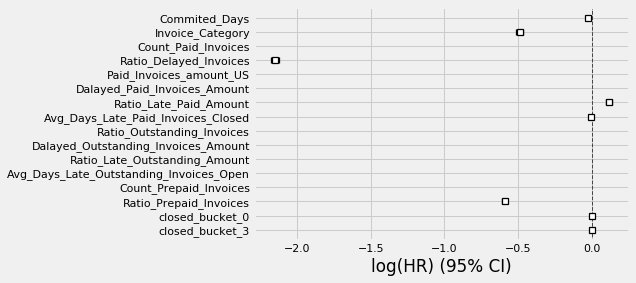

In [553]:
cph.plot(columns=['Commited_Days',
'Invoice_Category',
'Count_Paid_Invoices',
'Ratio_Delayed_Invoices',
'Paid_Invoices_amount_US',
'Dalayed_Paid_Invoices_Amount',
'Ratio_Late_Paid_Amount',
'Avg_Days_Late_Paid_Invoices_Closed',
'Ratio_Outstanding_Invoices',
'Dalayed_Outstanding_Invoices_Amount',
'Ratio_Late_Outstanding_Amount',
'Avg_Days_Late_Outstanding_Invoices_Open',
'Count_Prepaid_Invoices',
'Ratio_Prepaid_Invoices',
'closed_bucket_0',
'closed_bucket_3'])

In [550]:
import pickle
filename = 'Survival_Model_ALL_Data_Pickle_Form.pkl'
pickle.dump(cph, open(filename, 'wb'))

In [64]:
import pickle
filename = 'Survival_Model_ALL_Data.sav'
pickle.dump(cph, open(filename, 'wb'))

###### To find confidence scores, lets split the data up into 12 and calculate the amount predicted in each one of them

##### Valid : Oct 2018 |  Train : Rest

In [281]:
#Valid : Oct 2018
#Train : Rest
df = pd.read_csv('Entire_Dataset_Survival.csv')

df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['actual_close_date'] = pd.to_datetime(df['actual_close_date'])

test = df.loc[(df['invoice_date']<'2018-10-01') & (df['actual_close_date']>='2018-10-01')]
train = df[~df.index.isin(test.index)]

In [282]:
train2= train [['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

train2.dropna(inplace=True)
train2.drop_duplicates(inplace=True)

In [283]:
train3 = pd.get_dummies(train2)
print(train3.shape)

(798773, 52)


In [284]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.5)

scores = k_fold_cross_validation(cph, train3, 'DSO2', event_col='Paid', k=10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.7468341024745357, 0.7459264001944591, 0.7495240152763877, 0.7483387941513986, 0.7481694870181401, 0.7473560014463833, 0.7480912070367585, 0.747979996436822, 0.749447158522277, 0.7478617182099033]
0.7479528880767065
0.001031499413208142


In [285]:
cph.fit(train3, duration_col='DSO2', event_col='Paid')

<lifelines.CoxPHFitter:"None", fitted with 798773 total observations, 157468 right-censored observations>

In [286]:
test2=test[['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

test3 = pd.get_dummies(test2)
print(test2.shape)
print(test3.shape)

(113219, 46)
(113219, 52)


In [287]:
train_final_data =pd.read_csv('Train_Survival_AllData_LessColumns.csv')
train_final_data = pd.get_dummies(train_final_data)
missing_cols = set( train_final_data.columns ) - set( test3.columns )

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test3[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
test3 = test3[train_final_data.columns]

print(test3.shape)

(113219, 52)


In [288]:
#Predicting from the trained model
y_pred=cph.predict_median(test3)

In [289]:
#Adding to the dataset
test['Predicted_T2P'] = y_pred
test2=test.loc[~test['Predicted_T2P'].isin([np.inf, -np.inf])]
test2['Predicted_Date'] = pd.to_datetime(test2['invoice_date']) + pd.to_timedelta(test2['Predicted_T2P'], unit='d')
print(test.shape)
print(test2.shape)

(113219, 79)
(105040, 80)


In [290]:
LV_pred = test2.loc[test2['Customer_Segment'] == 'Lesser Value']
LV_pred=LV_pred.loc[(LV_pred['Predicted_Date']>='2018-09-25') & (LV_pred['Predicted_Date']<='2018-11-05')]
Pred = LV_pred.Invoice_Base_Amount_US.sum()
print(LV_pred.Invoice_Base_Amount_US.sum())

37204141.80199999


In [291]:
LV_Actual = test.loc[(test['actual_close_date']>='2018-10-01') & (test['actual_close_date']<='2018-10-31') & (test['Customer_Segment'] == 'Lesser Value')]
Actual = LV_Actual.Invoice_Base_Amount_US.sum()
print(LV_Actual.Invoice_Base_Amount_US.sum())

43000521.4529


In [292]:
print(abs(Actual - Pred))

5796379.650900006


##### Valid : Nov 2018 |  Train : Rest

In [293]:
df = pd.read_csv('Entire_Dataset_Survival.csv')

df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['actual_close_date'] = pd.to_datetime(df['actual_close_date'])

test = df.loc[(df['invoice_date']<'2018-11-01') & (df['actual_close_date']>='2018-11-01')]
train = df[~df.index.isin(test.index)]

In [294]:
train2= train [['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

train2.dropna(inplace=True)
train2.drop_duplicates(inplace=True)

In [295]:
train3 = pd.get_dummies(train2)
print(train3.shape)

(797071, 52)


In [296]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.5)

scores = k_fold_cross_validation(cph, train3, 'DSO2', event_col='Paid', k=10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.7446695073834595, 0.7448751149217747, 0.7425896027588225, 0.7455044966642902, 0.7445190670653362, 0.7451520894379224, 0.7458057696861937, 0.7439664296690456, 0.744293350394386, 0.7441004185166123]
0.7445475846497843
0.0008615751573227786


In [297]:
cph.fit(train3, duration_col='DSO2', event_col='Paid')

<lifelines.CoxPHFitter:"None", fitted with 797071 total observations, 157468 right-censored observations>

In [298]:
test2=test[['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

test3 = pd.get_dummies(test2)
print(test2.shape)
print(test3.shape)

(114923, 46)
(114923, 52)


In [299]:
train_final_data =pd.read_csv('Train_Survival_AllData_LessColumns.csv')
train_final_data = pd.get_dummies(train_final_data)
missing_cols = set( train_final_data.columns ) - set( test3.columns )

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test3[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
test3 = test3[train_final_data.columns]

print(test3.shape)

(114923, 52)


In [300]:
#Predicting from the trained model
y_pred=cph.predict_median(test3)

In [301]:
#Adding to the dataset
test['Predicted_T2P'] = y_pred
test2=test.loc[~test['Predicted_T2P'].isin([np.inf, -np.inf])]
test2['Predicted_Date'] = pd.to_datetime(test2['invoice_date']) + pd.to_timedelta(test2['Predicted_T2P'], unit='d')
print(test.shape)
print(test2.shape)

(114923, 79)
(103344, 80)


In [302]:
LV_pred = test2.loc[test2['Customer_Segment'] == 'Lesser Value']
LV_pred=LV_pred.loc[(LV_pred['Predicted_Date']>='2018-10-25') & (LV_pred['Predicted_Date']<='2018-12-05')]
Pred = LV_pred.Invoice_Base_Amount_US.sum()
print(LV_pred.Invoice_Base_Amount_US.sum())

34743046.6775


In [303]:
LV_Actual = test.loc[(test['actual_close_date']>='2018-11-01') & (test['actual_close_date']<='2018-11-30') & (test['Customer_Segment'] == 'Lesser Value')]
Actual = LV_Actual.Invoice_Base_Amount_US.sum()
print(LV_Actual.Invoice_Base_Amount_US.sum())

40848727.9653


In [304]:
print(abs(Actual - Pred))

6105681.287799999


##### Valid : Dec 2018 |  Train : Rest

In [305]:
df = pd.read_csv('Entire_Dataset_Survival.csv')

df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['actual_close_date'] = pd.to_datetime(df['actual_close_date'])

test = df.loc[(df['invoice_date']<'2018-12-01') & (df['actual_close_date']>='2018-12-01')]
train = df[~df.index.isin(test.index)]

In [306]:
train2= train [['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

train2.dropna(inplace=True)
train2.drop_duplicates(inplace=True)

In [307]:
train3 = pd.get_dummies(train2)
print(train3.shape)

(792102, 52)


In [308]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.5)

scores = k_fold_cross_validation(cph, train3, 'DSO2', event_col='Paid', k=10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.7439164904984682, 0.744303494560183, 0.7418304790492011, 0.7436750028938992, 0.7442194872599543, 0.7402911027661397, 0.7408795420159928, 0.743412030058469, 0.7445187080892143, 0.7440840929057235]
0.7431130430097245
0.001456289454853556


In [309]:
cph.fit(train3, duration_col='DSO2', event_col='Paid')

<lifelines.CoxPHFitter:"None", fitted with 792102 total observations, 157468 right-censored observations>

In [310]:
test2=test[['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

test3 = pd.get_dummies(test2)
print(test2.shape)
print(test3.shape)

(119914, 46)
(119914, 52)


In [311]:
train_final_data =pd.read_csv('Train_Survival_AllData_LessColumns.csv')
train_final_data = pd.get_dummies(train_final_data)
missing_cols = set( train_final_data.columns ) - set( test3.columns )

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test3[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
test3 = test3[train_final_data.columns]

print(test3.shape)

(119914, 52)


In [312]:
#Predicting from the trained model
y_pred=cph.predict_median(test3)

In [313]:
#Adding to the dataset
test['Predicted_T2P'] = y_pred
test2=test.loc[~test['Predicted_T2P'].isin([np.inf, -np.inf])]
test2['Predicted_Date'] = pd.to_datetime(test2['invoice_date']) + pd.to_timedelta(test2['Predicted_T2P'], unit='d')
print(test.shape)
print(test2.shape)

(119914, 79)
(112803, 80)


In [314]:
LV_pred = test2.loc[test2['Customer_Segment'] == 'Lesser Value']
LV_pred=LV_pred.loc[(LV_pred['Predicted_Date']>='2018-11-25') & (LV_pred['Predicted_Date']<='2019-01-05')]
Pred = LV_pred.Invoice_Base_Amount_US.sum()
print(LV_pred.Invoice_Base_Amount_US.sum())

42137358.257699996


In [315]:
LV_Actual = test.loc[(test['actual_close_date']>='2018-12-01') & (test['actual_close_date']<='2018-12-31') & (test['Customer_Segment'] == 'Lesser Value')]
Actual = LV_Actual.Invoice_Base_Amount_US.sum()
print(LV_Actual.Invoice_Base_Amount_US.sum())

52456929.0827


In [316]:
print(abs(Actual - Pred))

10319570.825000003


##### Valid : Jan 2019 |  Train : Rest

In [317]:
df = pd.read_csv('Entire_Dataset_Survival.csv')

df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['actual_close_date'] = pd.to_datetime(df['actual_close_date'])

test = df.loc[(df['invoice_date']<'2019-01-01') & (df['actual_close_date']>='2019-01-01')]
train = df[~df.index.isin(test.index)]

In [318]:
train2= train [['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

train2.dropna(inplace=True)
train2.drop_duplicates(inplace=True)

In [319]:
train3 = pd.get_dummies(train2)
print(train3.shape)

(797954, 52)


In [320]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.5)

scores = k_fold_cross_validation(cph, train3, 'DSO2', event_col='Paid', k=10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.7405749925185496, 0.739476969352235, 0.7393181262599317, 0.7397138994149322, 0.7398363934265456, 0.7394852382190992, 0.7390727171288486, 0.7384935226168731, 0.7400825766837421, 0.7403095911353919]
0.7396364026756148
0.0005790244092289094


In [321]:
cph.fit(train3, duration_col='DSO2', event_col='Paid')

<lifelines.CoxPHFitter:"None", fitted with 797954 total observations, 157468 right-censored observations>

In [322]:
test2=test[['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

test3 = pd.get_dummies(test2)
print(test2.shape)
print(test3.shape)

(114091, 46)
(114091, 52)


In [323]:
train_final_data =pd.read_csv('Train_Survival_AllData_LessColumns.csv')
train_final_data = pd.get_dummies(train_final_data)
missing_cols = set( train_final_data.columns ) - set( test3.columns )

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test3[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
test3 = test3[train_final_data.columns]

print(test3.shape)

(114091, 52)


In [324]:
#Predicting from the trained model
y_pred=cph.predict_median(test3)

In [325]:
#Adding to the dataset
test['Predicted_T2P'] = y_pred
test2=test.loc[~test['Predicted_T2P'].isin([np.inf, -np.inf])]
test2['Predicted_Date'] = pd.to_datetime(test2['invoice_date']) + pd.to_timedelta(test2['Predicted_T2P'], unit='d')
print(test.shape)
print(test2.shape)

(114091, 79)
(105522, 80)


In [326]:
LV_pred = test2.loc[test2['Customer_Segment'] == 'Lesser Value']
LV_pred=LV_pred.loc[(LV_pred['Predicted_Date']>='2018-12-25') & (LV_pred['Predicted_Date']<='2019-02-05')]
Pred = LV_pred.Invoice_Base_Amount_US.sum()
print(LV_pred.Invoice_Base_Amount_US.sum())

41691545.4328


In [327]:
LV_Actual = test.loc[(test['actual_close_date']>='2019-01-01') & (test['actual_close_date']<='2019-01-31') & (test['Customer_Segment'] == 'Lesser Value')]
Actual = LV_Actual.Invoice_Base_Amount_US.sum()
print(LV_Actual.Invoice_Base_Amount_US.sum())

50071289.9931


In [328]:
print(abs(Actual - Pred))

8379744.5603


##### Valid : Feb 2019 |  Train : Rest

In [329]:
df = pd.read_csv('Entire_Dataset_Survival.csv')

df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['actual_close_date'] = pd.to_datetime(df['actual_close_date'])

test = df.loc[(df['invoice_date']<'2019-02-01') & (df['actual_close_date']>='2019-02-01')]
train = df[~df.index.isin(test.index)]

In [330]:
train2= train [['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

train2.dropna(inplace=True)
train2.drop_duplicates(inplace=True)

In [331]:
train3 = pd.get_dummies(train2)
print(train3.shape)

(803279, 52)


In [332]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.5)

scores = k_fold_cross_validation(cph, train3, 'DSO2', event_col='Paid', k=10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.7443544337070361, 0.7427357198896876, 0.7452283156568088, 0.7455497715136457, 0.7451295975097612, 0.746161669866553, 0.7428853124541902, 0.7437358670929396, 0.7440967498193554, 0.7443091889930656]
0.7444186626503043
0.0010605590235371876


In [333]:
cph.fit(train3, duration_col='DSO2', event_col='Paid')

<lifelines.CoxPHFitter:"None", fitted with 803279 total observations, 157468 right-censored observations>

In [334]:
test2=test[['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

test3 = pd.get_dummies(test2)
print(test2.shape)
print(test3.shape)

(108804, 46)
(108804, 52)


In [335]:
train_final_data =pd.read_csv('Train_Survival_AllData_LessColumns.csv')
train_final_data = pd.get_dummies(train_final_data)
missing_cols = set( train_final_data.columns ) - set( test3.columns )

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test3[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
test3 = test3[train_final_data.columns]

print(test3.shape)

(108804, 52)


In [336]:
#Predicting from the trained model
y_pred=cph.predict_median(test3)

In [337]:
#Adding to the dataset
test['Predicted_T2P'] = y_pred
test2=test.loc[~test['Predicted_T2P'].isin([np.inf, -np.inf])]
test2['Predicted_Date'] = pd.to_datetime(test2['invoice_date']) + pd.to_timedelta(test2['Predicted_T2P'], unit='d')
print(test.shape)
print(test2.shape)

(108804, 79)
(102600, 80)


In [338]:
LV_pred = test2.loc[test2['Customer_Segment'] == 'Lesser Value']
LV_pred=LV_pred.loc[(LV_pred['Predicted_Date']>='2019-01-25') & (LV_pred['Predicted_Date']<='2019-03-05')]
Pred = LV_pred.Invoice_Base_Amount_US.sum()
print(LV_pred.Invoice_Base_Amount_US.sum())

34535207.6978


In [339]:
LV_Actual = test.loc[(test['actual_close_date']>='2019-02-01') & (test['actual_close_date']<='2019-02-28') & (test['Customer_Segment'] == 'Lesser Value')]
Actual = LV_Actual.Invoice_Base_Amount_US.sum()
print(LV_Actual.Invoice_Base_Amount_US.sum())

40746144.4659


In [340]:
print(abs(Actual - Pred))

6210936.7680999935


##### Valid : March 2019 |  Train : Rest

In [269]:
df = pd.read_csv('Entire_Dataset_Survival.csv')

df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['actual_close_date'] = pd.to_datetime(df['actual_close_date'])

test = df.loc[(df['invoice_date']<'2019-03-01') & (df['actual_close_date']>='2019-03-01')]
train = df[~df.index.isin(test.index)]

In [270]:
print(df.shape)
print(train.shape)
print(test.shape)

(1324359, 78)
(1218508, 78)
(105851, 78)


In [271]:
train2= train [['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

train2.dropna(inplace=True)
train2.drop_duplicates(inplace=True)

In [272]:
train3 = pd.get_dummies(train2)
print(train3.shape)

(806255, 52)


In [273]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.5)

scores = k_fold_cross_validation(cph, train3, 'DSO2', event_col='Paid', k=10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.7456022441675393, 0.745562204256193, 0.7456094827538792, 0.7464058666580096, 0.7464191135903322, 0.7477883888580411, 0.7449299165794647, 0.7467566028675428, 0.7452932833924402, 0.7461703845715103]
0.7460537487694952
0.0007910887167559596


In [229]:
cph.fit(train3, duration_col='DSO2', event_col='Paid')

<lifelines.CoxPHFitter:"None", fitted with 806255 total observations, 157468 right-censored observations>

In [274]:
test2=test[['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

test3 = pd.get_dummies(test2)
print(test2.shape)
print(test3.shape)

(105851, 46)
(105851, 52)


In [275]:
train_final_data =pd.read_csv('Train_Survival_AllData_LessColumns.csv')
train_final_data = pd.get_dummies(train_final_data)
missing_cols = set( train_final_data.columns ) - set( test3.columns )

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test3[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
test3 = test3[train_final_data.columns]

print(test3.shape)

(105851, 52)


In [276]:
#Predicting from the trained model
y_pred=cph.predict_median(test3)

In [277]:
#Adding to the dataset
test['Predicted_T2P'] = y_pred
test2=test.loc[~test['Predicted_T2P'].isin([np.inf, -np.inf])]
test2['Predicted_Date'] = pd.to_datetime(test2['invoice_date']) + pd.to_timedelta(test2['Predicted_T2P'], unit='d')
print(test.shape)
print(test2.shape)

(105851, 79)
(100118, 80)


In [278]:
LV_pred = test2.loc[test2['Customer_Segment'] == 'Lesser Value']
LV_pred=LV_pred.loc[(LV_pred['Predicted_Date']>='2019-02-25') & (LV_pred['Predicted_Date']<='2019-04-05')]
Pred = LV_pred.Invoice_Base_Amount_US.sum()
print(LV_pred.Invoice_Base_Amount_US.sum())

30962330.6103


In [279]:
LV_Actual = test.loc[(test['actual_close_date']>='2019-03-01') & (test['actual_close_date']<='2019-03-31') & (test['Customer_Segment'] == 'Lesser Value')]
Actual = LV_Actual.Invoice_Base_Amount_US.sum()
print(LV_Actual.Invoice_Base_Amount_US.sum())

47988128.631


In [280]:
print(abs(Actual - Pred))

17025798.020699997


##### Valid : April 2019 |  Train : Rest

In [347]:
df = pd.read_csv('Entire_Dataset_Survival.csv')


df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['actual_close_date'] = pd.to_datetime(df['actual_close_date'])

test = df.loc[(df['invoice_date'] < '2019-04-01') & (df['actual_close_date'] >= '2019-04-01')]
train = df[~df.index.isin(test.index)]

In [348]:
train2= train [['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

train2.dropna(inplace=True)
train2.drop_duplicates(inplace=True)

In [349]:
train3 = pd.get_dummies(train2)
print(train3.shape)

(800413, 52)


In [350]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.5)

scores = k_fold_cross_validation(cph, train3, 'DSO2', event_col='Paid', k=10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.7441538778809846, 0.7430762733948922, 0.7440877336641334, 0.7416402886303075, 0.7434357408850474, 0.7424543778864102, 0.74279248181948, 0.7431096506690641, 0.7419519104993075, 0.7439094318610734]
0.74306117671907
0.000824622580578661


In [351]:
cph.fit(train3, duration_col='DSO2', event_col='Paid')

<lifelines.CoxPHFitter:"None", fitted with 800413 total observations, 157468 right-censored observations>

In [352]:
test2=test[['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

test3 = pd.get_dummies(test2)
print(test2.shape)
print(test3.shape)

(111682, 46)
(111682, 52)


In [353]:
train_final_data =pd.read_csv('Train_Survival_AllData_LessColumns.csv')
train_final_data = pd.get_dummies(train_final_data)
missing_cols = set( train_final_data.columns ) - set( test3.columns )

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test3[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
test3 = test3[train_final_data.columns]

print(test3.shape)

(111682, 52)


In [354]:
#Predicting from the trained model
y_pred=cph.predict_median(test3)

In [355]:
#Adding to the dataset
test['Predicted_T2P'] = y_pred
test2=test.loc[~test['Predicted_T2P'].isin([np.inf, -np.inf])]
test2['Predicted_Date'] = pd.to_datetime(test2['invoice_date']) + pd.to_timedelta(test2['Predicted_T2P'], unit='d')
print(test.shape)
print(test2.shape)

(111682, 79)
(101333, 80)


In [356]:
LV_pred = test2.loc[test2['Customer_Segment'] == 'Lesser Value']
LV_pred=LV_pred.loc[(LV_pred['Predicted_Date']>='2019-03-25') & (LV_pred['Predicted_Date']<='2019-05-05')]
Pred = LV_pred.Invoice_Base_Amount_US.sum()
print(LV_pred.Invoice_Base_Amount_US.sum())

31195273.3597


In [357]:
LV_Actual = test.loc[(test['actual_close_date']>='2019-04-01') & (test['actual_close_date']<='2019-04-30') & (test['Customer_Segment'] == 'Lesser Value')]
Actual = LV_Actual.Invoice_Base_Amount_US.sum()
print(LV_Actual.Invoice_Base_Amount_US.sum())

48206939.5399


In [358]:
print(abs(Actual - Pred))

17011666.180199996


##### Valid : May 2019 |  Train : Rest

In [360]:
df = pd.read_csv('Entire_Dataset_Survival.csv')


df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['actual_close_date'] = pd.to_datetime(df['actual_close_date'])

test = df.loc[(df['invoice_date'] < '2019-05-01') & (df['actual_close_date'] >= '2019-05-01')]
train = df[~df.index.isin(test.index)]

In [361]:
train2= train [['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

train2.dropna(inplace=True)
train2.drop_duplicates(inplace=True)

In [362]:
train3 = pd.get_dummies(train2)
print(train3.shape)

(810620, 52)


In [363]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.5)

scores = k_fold_cross_validation(cph, train3, 'DSO2', event_col='Paid', k=10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.7414005631673378, 0.7402903616109946, 0.7402735512689687, 0.741315820284298, 0.7408198542028709, 0.7419988920076225, 0.742253593900967, 0.7402530642060305, 0.7421636073276031, 0.7412464563009338]
0.7412015764277626
0.0007388875668032855


In [364]:
cph.fit(train3, duration_col='DSO2', event_col='Paid')

<lifelines.CoxPHFitter:"None", fitted with 810620 total observations, 157468 right-censored observations>

In [365]:
test2=test[['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

test3 = pd.get_dummies(test2)
print(test2.shape)
print(test3.shape)

(101493, 46)
(101493, 52)


In [366]:
train_final_data =pd.read_csv('Train_Survival_AllData_LessColumns.csv')
train_final_data = pd.get_dummies(train_final_data)
missing_cols = set( train_final_data.columns ) - set( test3.columns )

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test3[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
test3 = test3[train_final_data.columns]

print(test3.shape)

(101493, 52)


In [367]:
#Predicting from the trained model
y_pred=cph.predict_median(test3)

In [368]:
#Adding to the dataset
test['Predicted_T2P'] = y_pred
test2=test.loc[~test['Predicted_T2P'].isin([np.inf, -np.inf])]
test2['Predicted_Date'] = pd.to_datetime(test2['invoice_date']) + pd.to_timedelta(test2['Predicted_T2P'], unit='d')
print(test.shape)
print(test2.shape)

(101493, 79)
(93514, 80)


In [369]:
LV_pred = test2.loc[test2['Customer_Segment'] == 'Lesser Value']
LV_pred=LV_pred.loc[(LV_pred['Predicted_Date']>='2019-04-25') & (LV_pred['Predicted_Date']<='2019-06-05')]
Pred = LV_pred.Invoice_Base_Amount_US.sum()
print(LV_pred.Invoice_Base_Amount_US.sum())

29460025.3486


In [370]:
LV_Actual = test.loc[(test['actual_close_date']>='2019-05-01') & (test['actual_close_date']<='2019-05-31') & (test['Customer_Segment'] == 'Lesser Value')]
Actual = LV_Actual.Invoice_Base_Amount_US.sum()
print(LV_Actual.Invoice_Base_Amount_US.sum())

43822024.3283


In [371]:
print(abs(Actual - Pred))

14361998.9797


##### Valid : June 2019 |  Train : Rest

In [373]:
df = pd.read_csv('Entire_Dataset_Survival.csv')


df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['actual_close_date'] = pd.to_datetime(df['actual_close_date'])

test = df.loc[(df['invoice_date'] < '2019-06-01') & (df['actual_close_date'] >= '2019-06-01')]
train = df[~df.index.isin(test.index)]

In [374]:
train2= train [['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

train2.dropna(inplace=True)
train2.drop_duplicates(inplace=True)

In [375]:
train3 = pd.get_dummies(train2)
print(train3.shape)

(813225, 52)


In [376]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.5)

scores = k_fold_cross_validation(cph, train3, 'DSO2', event_col='Paid', k=10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.7437474945931596, 0.740995347455474, 0.7427268494532544, 0.7407002178443648, 0.7408226559049069, 0.7429349061963592, 0.7428174343099995, 0.7434051525896752, 0.7449037589184857, 0.7442156723447411]
0.7427269489610422
0.0013870876363863856


In [377]:
cph.fit(train3, duration_col='DSO2', event_col='Paid')

<lifelines.CoxPHFitter:"None", fitted with 813225 total observations, 157468 right-censored observations>

In [378]:
test2=test[['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

test3 = pd.get_dummies(test2)
print(test2.shape)
print(test3.shape)

(98907, 46)
(98907, 52)


In [379]:
train_final_data =pd.read_csv('Train_Survival_AllData_LessColumns.csv')
train_final_data = pd.get_dummies(train_final_data)
missing_cols = set( train_final_data.columns ) - set( test3.columns )

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test3[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
test3 = test3[train_final_data.columns]

print(test3.shape)

(98907, 52)


In [380]:
#Predicting from the trained model
y_pred=cph.predict_median(test3)

In [381]:
#Adding to the dataset
test['Predicted_T2P'] = y_pred
test2=test.loc[~test['Predicted_T2P'].isin([np.inf, -np.inf])]
test2['Predicted_Date'] = pd.to_datetime(test2['invoice_date']) + pd.to_timedelta(test2['Predicted_T2P'], unit='d')
print(test.shape)
print(test2.shape)

(98907, 79)
(91419, 80)


In [389]:
LV_pred = test2.loc[test2['Customer_Segment'] == 'Lesser Value']
LV_pred=LV_pred.loc[(LV_pred['Predicted_Date']>='2019-05-25') & (LV_pred['Predicted_Date']<='2019-07-05')]
Pred = LV_pred.Invoice_Base_Amount_US.sum()
print(LV_pred.Invoice_Base_Amount_US.sum())

27987313.432400003


In [390]:
LV_Actual = test.loc[(test['actual_close_date']>='2019-06-01') & (test['actual_close_date']<='2019-06-30') & (test['Customer_Segment'] == 'Lesser Value')]
Actual = LV_Actual.Invoice_Base_Amount_US.sum()
print(LV_Actual.Invoice_Base_Amount_US.sum())

44072227.8923


In [391]:
print(abs(Actual - Pred))

16084914.4599


##### Valid : July 2019 |  Train : Rest

In [392]:
df = pd.read_csv('Entire_Dataset_Survival.csv')


df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['actual_close_date'] = pd.to_datetime(df['actual_close_date'])

test = df.loc[(df['invoice_date'] < '2019-07-01') & (df['actual_close_date'] >= '2019-07-01')]
train = df[~df.index.isin(test.index)]

In [393]:
train2= train [['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

train2.dropna(inplace=True)
train2.drop_duplicates(inplace=True)

In [394]:
train3 = pd.get_dummies(train2)
print(train3.shape)

(821173, 52)


In [395]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.5)

scores = k_fold_cross_validation(cph, train3, 'DSO2', event_col='Paid', k=10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.742361521294073, 0.7427184040869818, 0.7423119560205723, 0.7415014738447726, 0.7426554902295811, 0.741740817456314, 0.7428663246732954, 0.7424956305633859, 0.7397217712279115, 0.7430315861029197]
0.7421404975499808
0.0009242704529319832


In [396]:
cph.fit(train3, duration_col='DSO2', event_col='Paid')

<lifelines.CoxPHFitter:"None", fitted with 821173 total observations, 157468 right-censored observations>

In [397]:
test2=test[['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

test3 = pd.get_dummies(test2)
print(test2.shape)
print(test3.shape)

(90971, 46)
(90971, 52)


In [398]:
train_final_data =pd.read_csv('Train_Survival_AllData_LessColumns.csv')
train_final_data = pd.get_dummies(train_final_data)
missing_cols = set( train_final_data.columns ) - set( test3.columns )

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test3[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
test3 = test3[train_final_data.columns]

print(test3.shape)

(90971, 52)


In [399]:
#Predicting from the trained model
y_pred=cph.predict_median(test3)

In [400]:
#Adding to the dataset
test['Predicted_T2P'] = y_pred
test2=test.loc[~test['Predicted_T2P'].isin([np.inf, -np.inf])]
test2['Predicted_Date'] = pd.to_datetime(test2['invoice_date']) + pd.to_timedelta(test2['Predicted_T2P'], unit='d')
print(test.shape)
print(test2.shape)

(90971, 79)
(87790, 80)


In [402]:
LV_pred = test2.loc[test2['Customer_Segment'] == 'Lesser Value']
LV_pred=LV_pred.loc[(LV_pred['Predicted_Date']>='2019-06-25') & (LV_pred['Predicted_Date']<='2019-08-05')]
Pred = LV_pred.Invoice_Base_Amount_US.sum()
print(LV_pred.Invoice_Base_Amount_US.sum())

27050177.960499994


In [401]:
LV_Actual = test.loc[(test['actual_close_date']>='2019-07-01') & (test['actual_close_date']<='2019-07-31') & (test['Customer_Segment'] == 'Lesser Value')]
Actual = LV_Actual.Invoice_Base_Amount_US.sum()
print(LV_Actual.Invoice_Base_Amount_US.sum())

43646733.971300006


In [403]:
print(abs(Actual - Pred))

16596556.010800011


##### Valid : August 2019 |  Train : Rest

In [408]:
df = pd.read_csv('Entire_Dataset_Survival.csv')


df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['actual_close_date'] = pd.to_datetime(df['actual_close_date'])

test = df.loc[(df['invoice_date'] < '2019-08-01') & (df['actual_close_date'] >= '2019-08-01')]
train = df[~df.index.isin(test.index)]

In [409]:
train2= train [['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

train2.dropna(inplace=True)
train2.drop_duplicates(inplace=True)

In [410]:
train2= train [['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

train2.dropna(inplace=True)
train2.drop_duplicates(inplace=True)

In [411]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.5)

scores = k_fold_cross_validation(cph, train3, 'DSO2', event_col='Paid', k=10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.7433471893074435, 0.7412979472098765, 0.7426517030653936, 0.7440086515158391, 0.7421919895824935, 0.7396465465246144, 0.7422607987745656, 0.7419729450330957, 0.7430264332540644, 0.7408861751956208]
0.7421290379463008
0.001205786431521788


In [412]:
cph.fit(train3, duration_col='DSO2', event_col='Paid')

<lifelines.CoxPHFitter:"None", fitted with 821173 total observations, 157468 right-censored observations>

In [413]:
test2=test[['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

test3 = pd.get_dummies(test2)
print(test2.shape)
print(test3.shape)

(72801, 46)
(72801, 52)


In [414]:
train_final_data =pd.read_csv('Train_Survival_AllData_LessColumns.csv')
train_final_data = pd.get_dummies(train_final_data)
missing_cols = set( train_final_data.columns ) - set( test3.columns )

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test3[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
test3 = test3[train_final_data.columns]

print(test3.shape)

(72801, 52)


In [415]:
#Predicting from the trained model
y_pred=cph.predict_median(test3)

In [416]:
#Adding to the dataset
test['Predicted_T2P'] = y_pred
test2=test.loc[~test['Predicted_T2P'].isin([np.inf, -np.inf])]
test2['Predicted_Date'] = pd.to_datetime(test2['invoice_date']) + pd.to_timedelta(test2['Predicted_T2P'], unit='d')
print(test.shape)
print(test2.shape)

(72801, 79)
(70908, 80)


In [420]:
LV_pred = test2.loc[test2['Customer_Segment'] == 'Lesser Value']
LV_pred=LV_pred.loc[(LV_pred['Predicted_Date']>='2019-07-25') & (LV_pred['Predicted_Date']<='2019-09-05')]
Pred = LV_pred.Invoice_Base_Amount_US.sum()
print(LV_pred.Invoice_Base_Amount_US.sum())

26291431.773099996


In [421]:
LV_Actual = test.loc[(test['actual_close_date']>='2019-08-01') & (test['actual_close_date']<='2019-08-31') & (test['Customer_Segment'] == 'Lesser Value')]
Actual = LV_Actual.Invoice_Base_Amount_US.sum()
print(LV_Actual.Invoice_Base_Amount_US.sum())

49327303.8287


In [422]:
print(abs(Actual - Pred))

23035872.055600002


##### Valid : September 2019 |  Train : Rest

In [485]:
df = pd.read_csv('Entire_Dataset_Survival.csv')


df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['actual_close_date'] = pd.to_datetime(df['actual_close_date'])

test = df.loc[(df['invoice_date'] < '2019-09-01') & (df['actual_close_date'] >= '2019-09-01')]
train = df[~df.index.isin(test.index)]

In [486]:
print(df.shape)
print(train.shape)
print(test.shape)

(1324359, 78)
(1271226, 78)
(53133, 78)


In [487]:
train2= train [['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

train2.dropna(inplace=True)
train2.drop_duplicates(inplace=True)

In [488]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.5)

scores = k_fold_cross_validation(cph, train3, 'DSO2', event_col='Paid', k=10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.7415328974579125, 0.7423961562284167, 0.7412808064331775, 0.7420966834763644, 0.7434859968258031, 0.742013559303498, 0.7424557252585853, 0.742787774255176, 0.741121246476578, 0.7422514013437568]
0.7421422247059268
0.0006761277655552382


In [489]:
cph.fit(train3, duration_col='DSO2', event_col='Paid')

<lifelines.CoxPHFitter:"None", fitted with 821173 total observations, 157468 right-censored observations>

In [490]:
test2=test[['security_country_code', 'Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 
                'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'industry_name', 
                'Ratio_Prepaid_Invoices',  'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4','Open_60_more',
                'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 
                'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON',
       'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 
                'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 
                'DSO2', 'Paid', 'Customer_Segment']]

test3 = pd.get_dummies(test2)
print(test2.shape)
print(test3.shape)

(53133, 46)
(53133, 52)


In [491]:
train_final_data =pd.read_csv('Train_Survival_AllData_LessColumns.csv')
train_final_data = pd.get_dummies(train_final_data)
missing_cols = set( train_final_data.columns ) - set( test3.columns )

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test3[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
test3 = test3[train_final_data.columns]

print(test3.shape)

(53133, 52)


In [492]:
test3.columns

Index(['Invoice_Base_Amount_US', 'Commited_Days', 'Invoice_Category', 'Ratio_Delayed_Invoices', 'Ratio_Late_Paid_Amount', 'Avg_Days_Late_Paid_Invoices_Closed', 'Ratio_Prepaid_Invoices', 'Invoice_OKS', 'TM_Invoice', 'OM_Invoice', 'closed_bucket_0', 'closed_bucket_1', 'closed_bucket_2', 'closed_bucket_3', 'closed_bucket_4', 'Open_60_more', 'HSR_SCA_Invoice', 'SCA_Invoice', 'SAAS_OKS_Invoice', 'HSR_TM_Invoice', 'HSR_Invoice_OKS', 'HSR_OM_Invoice', 'Other_Invoice_Type_Name', 'WCS', 'GSH', 'GSR', 'GSF', 'ISF', 'SIT', 'ISR', 'NON', 'Other_functional_group_short_name', 'month_num_due', 'day_of_month_due', 'day_of_week_due', 'month_num_created', 'day_of_month_created', 'day_of_week_created', 'month_num_age', 'day_of_month_age', 'day_of_week_age', 'DSO2', 'Paid', 'security_country_code_CA', 'security_country_code_US', 'industry_name_Financial                                         ', 'industry_name_Hospitality                                       ',
       'industry_name_Retail               

In [493]:
test4 = test3.drop(columns=['DSO2','Paid'])

In [494]:
#Predicting from the trained model
y_pred=cph.predict_median(test4)

In [495]:
y_pred2 = list(y_pred[0.5])

In [496]:
#Adding to the dataset
test['Predicted_T2P'] = y_pred2
test2=test.loc[~test['Predicted_T2P'].isin([np.inf, -np.inf])]
test2['Predicted_Date'] = pd.to_datetime(test2['invoice_date']) + pd.to_timedelta(test2['Predicted_T2P'], unit='d')
print(test.shape)
print(test2.shape)

(53133, 79)
(52365, 80)


In [497]:
test.head()

,Actual_close_date_Month,Avg_Days_Late_Outstanding_Invoices_Open,Avg_Days_Late_Paid_Invoices_Closed,Commited_Days,Count_Delayed_Invoice,Count_Delayed_Outstanding_Invoice,Count_Outstanding_Invoices,Count_Paid_Invoices,Count_Prepaid_Invoices,DSO,DSO2,Dalayed_Outstanding_Invoices_Amount,Dalayed_Paid_Invoices_Amount,Delay_Status,GSF,GSH,GSR,HSR_Invoice_OKS,HSR_OM_Invoice,HSR_SCA_Invoice,HSR_TM_Invoice,ISF,ISR,Invc_commited_date_month,Invc_creation_month,Invoice_Base_Amount_US,Invoice_Category,Invoice_OKS,ME_Due_Date,ME_Inv_Date,MME_Due_Date,MME_Inv_Date,NON,OM_Invoice,Open_60_more,Other_Invoice_Type_Name,Other_functional_group_short_name,Outstanding_Invoices_Amount,Outstanding_Invoices_amount,Paid,Paid_Invoices_amount_US,Payment_Quarter,Payment_Term,Ratio_Delayed_Invoices,Ratio_Late_Outstanding_Amount,Ratio_Late_Paid_Amount,Ratio_Outstanding_Invoices,Ratio_Prepaid_Invoices,SAAS_OKS_Invoice,SCA_Invoice,SIT,TM_Invoice,WCS,actual_close_date,aging_date,closed_bucket_0,closed_bucket_1,closed_bucket_2,closed_bucket_3,closed_bucket_4,country_code,customer_nbr,industry_name,invoice_date,invoice_nbr,payment_due_date,security_country_code,source_country_code,month_num_due,day_of_month_due,day_of_week_due,month_num_created,day_of_month_created,day_of_week_created,month_num_age,day_of_month_age,day_of_week_age,Customer_Segment,Predicted_T2P
573807,9,"19,010,826.98",42.00,30.00,2473197,3109,3109,2766181,247466,2.00,32,"3,355,941.78","452,320,893.30",1,0,0,0,0,0,0,0,0,0,9,8.00,70.83,0,1,1,1,0,0,0,0,3109,0,0,"3,355,941.78",nan,1,"555,466,224.00",2019Q3,30-Jan,0.89,1.00,0.81,1,0.09,0,0,0,0,1,2019-09-30,2019-08-29,292984,1677891,436742,82618,275946,US,43610,Financial ...,2019-08-29,nan,2019-09-28,US,0,9,28,5,8,29,3,8,29,3,High Value,39.00
573809,9,"19,010,826.98",42.00,30.00,2473197,3109,3109,2766181,247466,24.00,54,"3,355,941.78","452,320,893.30",1,0,0,0,0,0,0,0,0,0,8,7.00,76.85,0,1,0,0,0,0,0,0,3109,0,0,"3,355,941.78",nan,1,"555,466,224.00",2019Q3,30-Jan,0.89,1.00,0.81,1,0.09,0,0,0,0,1,2019-09-18,2019-07-26,292984,1677891,436742,82618,275946,US,43610,Financial ...,2019-07-26,nan,2019-08-25,US,0,8,25,6,7,26,4,7,26,4,High Value,40.00
573817,9,"19,000,793.45",117.00,30.00,39692,651,651,45887,4691,53.00,83,"239,051.31","37,284,690.51",2,0,0,0,0,0,0,0,0,0,8,7.00,539.40,0,1,0,0,1,1,0,0,651,0,0,"239,051.31",nan,1,"55,800,919.34",2019Q3,30-Jan,0.86,1.00,0.67,1,0.10,0,0,0,0,1,2019-09-24,2019-08-01,6195,9419,10235,3436,16602,US,28291,Retail ...,2019-07-03,nan,2019-08-02,US,0,8,2,4,7,3,2,8,1,3,High Value,46.00
573830,9,0.00,40.00,30.00,23,0,0,46,0,0.00,30,0.00,"3,613.11",0,0,0,1,0,0,0,0,0,0,9,8.00,146.99,0,0,0,0,1,1,0,0,0,0,0,0.00,nan,1,"6,990.80",2019Q3,30-Jan,0.50,0.00,0.52,0,0.00,0,1,0,0,0,2019-09-12,2019-08-13,23,21,0,0,2,US,9301945,Retail ...,2019-08-13,nan,2019-09-12,US,0,9,12,3,8,13,1,8,13,1,Lesser Value,30.00
573837,9,"19,001,223.87",41.00,33.00,117655,4366,4366,269311,147049,131.00,164,"9,311,104.50","146,071,122.40",4,0,0,0,0,0,0,0,0,0,5,3.00,"1,014.75",0,1,0,1,1,0,0,0,4366,0,0,"9,311,104.50",nan,1,"310,566,699.60",2019Q2,31-60,0.44,1.00,0.47,1,0.55,0,0,0,0,1,2019-09-09,2019-05-01,151656,87118,10399,5784,14354,US,28098,Retail ...,2019-03-29,nan,2019-05-01,US,0,5,1,2,3,29,4,5,1,2,High Value,36.00


In [543]:
LV_pred = test2.loc[(test2['Customer_Segment'] == 'Lesser Value')]
LV_pred2=LV_pred.loc[(LV_pred['Predicted_Date']>='2019-08-25') & (LV_pred['Predicted_Date']<='2019-10-05')]
Pred = LV_pred2.Invoice_Base_Amount_US.sum()
print(LV_pred2.Invoice_Base_Amount_US.sum())

21039312.089100003


In [544]:
LV_Actual2 = test.loc[(test['actual_close_date']>='2019-09-01') & (test['actual_close_date']<='2019-09-30') & (test['Customer_Segment'] == 'Lesser Value')]
Actual = LV_Actual2.Invoice_Base_Amount_US.sum()
print(LV_Actual2.Invoice_Base_Amount_US.sum())

47498626.0652


In [545]:
print(abs(Actual - Pred))

26459313.976099998


In [538]:
LV_pred[['DSO2','Predicted_T2P','actual_close_date','Predicted_Date']]

,DSO2,Predicted_T2P,actual_close_date,Predicted_Date
573830,30,30.00,2019-09-12,2019-09-12
573847,30,46.00,2019-09-10,2019-09-26
573861,30,46.00,2019-09-12,2019-09-28
573862,30,30.00,2019-09-10,2019-09-10
573872,32,33.00,2019-09-21,2019-09-22
573883,86,47.00,2019-09-19,2019-08-11
573890,30,31.00,2019-09-12,2019-09-13
573900,30,30.00,2019-09-10,2019-09-10
573968,285,33.00,2019-09-25,2019-01-16
573972,30,30.00,2019-09-10,2019-09-10


In [537]:
mean_absolute_error(LV_pred['DSO2'],LV_pred['Predicted_T2P'])

49.889816360601

In [539]:
test.head()

,Actual_close_date_Month,Avg_Days_Late_Outstanding_Invoices_Open,Avg_Days_Late_Paid_Invoices_Closed,Commited_Days,Count_Delayed_Invoice,Count_Delayed_Outstanding_Invoice,Count_Outstanding_Invoices,Count_Paid_Invoices,Count_Prepaid_Invoices,DSO,DSO2,Dalayed_Outstanding_Invoices_Amount,Dalayed_Paid_Invoices_Amount,Delay_Status,GSF,GSH,GSR,HSR_Invoice_OKS,HSR_OM_Invoice,HSR_SCA_Invoice,HSR_TM_Invoice,ISF,ISR,Invc_commited_date_month,Invc_creation_month,Invoice_Base_Amount_US,Invoice_Category,Invoice_OKS,ME_Due_Date,ME_Inv_Date,MME_Due_Date,MME_Inv_Date,NON,OM_Invoice,Open_60_more,Other_Invoice_Type_Name,Other_functional_group_short_name,Outstanding_Invoices_Amount,Outstanding_Invoices_amount,Paid,Paid_Invoices_amount_US,Payment_Quarter,Payment_Term,Ratio_Delayed_Invoices,Ratio_Late_Outstanding_Amount,Ratio_Late_Paid_Amount,Ratio_Outstanding_Invoices,Ratio_Prepaid_Invoices,SAAS_OKS_Invoice,SCA_Invoice,SIT,TM_Invoice,WCS,actual_close_date,aging_date,closed_bucket_0,closed_bucket_1,closed_bucket_2,closed_bucket_3,closed_bucket_4,country_code,customer_nbr,industry_name,invoice_date,invoice_nbr,payment_due_date,security_country_code,source_country_code,month_num_due,day_of_month_due,day_of_week_due,month_num_created,day_of_month_created,day_of_week_created,month_num_age,day_of_month_age,day_of_week_age,Customer_Segment,Predicted_T2P
573807,9,"19,010,826.98",42.00,30.00,2473197,3109,3109,2766181,247466,2.00,32,"3,355,941.78","452,320,893.30",1,0,0,0,0,0,0,0,0,0,9,8.00,70.83,0,1,1,1,0,0,0,0,3109,0,0,"3,355,941.78",nan,1,"555,466,224.00",2019Q3,30-Jan,0.89,1.00,0.81,1,0.09,0,0,0,0,1,2019-09-30,2019-08-29,292984,1677891,436742,82618,275946,US,43610,Financial ...,2019-08-29,nan,2019-09-28,US,0,9,28,5,8,29,3,8,29,3,High Value,39.00
573809,9,"19,010,826.98",42.00,30.00,2473197,3109,3109,2766181,247466,24.00,54,"3,355,941.78","452,320,893.30",1,0,0,0,0,0,0,0,0,0,8,7.00,76.85,0,1,0,0,0,0,0,0,3109,0,0,"3,355,941.78",nan,1,"555,466,224.00",2019Q3,30-Jan,0.89,1.00,0.81,1,0.09,0,0,0,0,1,2019-09-18,2019-07-26,292984,1677891,436742,82618,275946,US,43610,Financial ...,2019-07-26,nan,2019-08-25,US,0,8,25,6,7,26,4,7,26,4,High Value,40.00
573817,9,"19,000,793.45",117.00,30.00,39692,651,651,45887,4691,53.00,83,"239,051.31","37,284,690.51",2,0,0,0,0,0,0,0,0,0,8,7.00,539.40,0,1,0,0,1,1,0,0,651,0,0,"239,051.31",nan,1,"55,800,919.34",2019Q3,30-Jan,0.86,1.00,0.67,1,0.10,0,0,0,0,1,2019-09-24,2019-08-01,6195,9419,10235,3436,16602,US,28291,Retail ...,2019-07-03,nan,2019-08-02,US,0,8,2,4,7,3,2,8,1,3,High Value,46.00
573830,9,0.00,40.00,30.00,23,0,0,46,0,0.00,30,0.00,"3,613.11",0,0,0,1,0,0,0,0,0,0,9,8.00,146.99,0,0,0,0,1,1,0,0,0,0,0,0.00,nan,1,"6,990.80",2019Q3,30-Jan,0.50,0.00,0.52,0,0.00,0,1,0,0,0,2019-09-12,2019-08-13,23,21,0,0,2,US,9301945,Retail ...,2019-08-13,nan,2019-09-12,US,0,9,12,3,8,13,1,8,13,1,Lesser Value,30.00
573837,9,"19,001,223.87",41.00,33.00,117655,4366,4366,269311,147049,131.00,164,"9,311,104.50","146,071,122.40",4,0,0,0,0,0,0,0,0,0,5,3.00,"1,014.75",0,1,0,1,1,0,0,0,4366,0,0,"9,311,104.50",nan,1,"310,566,699.60",2019Q2,31-60,0.44,1.00,0.47,1,0.55,0,0,0,0,1,2019-09-09,2019-05-01,151656,87118,10399,5784,14354,US,28098,Retail ...,2019-03-29,nan,2019-05-01,US,0,5,1,2,3,29,4,5,1,2,High Value,36.00


In [ ]:
#Reading the closed data and merging them together
q1=pd.read_csv('train_2019q1.csv')
q2=pd.read_csv('train_2019q2.csv')
q3=pd.read_csv('train_2019q3.csv')
q4=pd.read_csv('train_2018q4.csv')

df=q4.append([q1,q2,q3])
print(df.shape)